# 예제

## 1. 이미지 불러오기

In [136]:
'''
!pip install cmake
!pip install opencv-python
!conda install -y dlib
'''

'\n!pip install cmake\n!pip install opencv-python\n!conda install -y dlib\n'

In [137]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


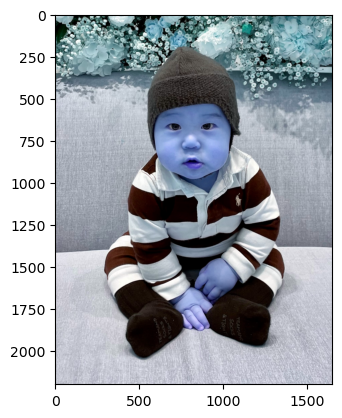

BGR 이미지


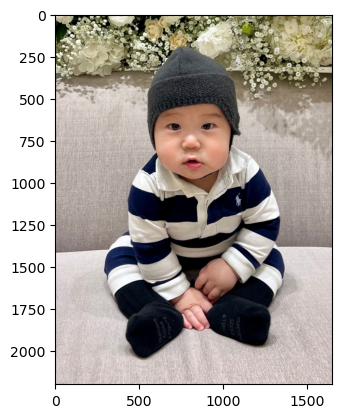

RGB 이미지


In [133]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/AIFFEL_quest_rs/Exploration/Ex01/images/jae_2.jpg')

img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관
plt.imshow(img_bgr)
plt.show()
print("BGR 이미지")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BGR -> RGB 변환
plt.imshow(img_rgb)
plt.show()
print("RGB 이미지")

## 2. Face detector

In [134]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid) #1:작은 얼굴 검출을 위해 이미지를 한 번 키움

# 찾은 얼굴 영역의 좌표 (여러 얼굴 가능)
print(dlib_rects) 

rectangles[[(605, 554) (1067, 1016)]]


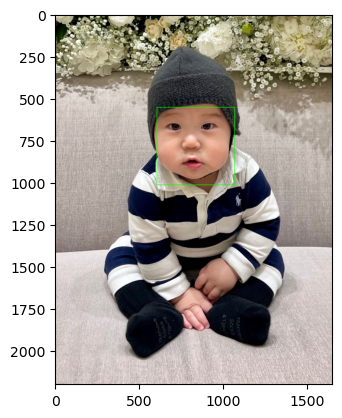

605 554 1067 1016


In [135]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    cv2.rectangle(img_show, # 사각형을 그릴 대상 이미지
                  (l,t), (r,b), # 사각형 좌표
                  (0,255,0), # 사각형 색상(BGR 순서)
                  2, # 선두께
                  lineType=cv2.LINE_AA) # 선의 렌더링 방식
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

print(l,t,r,b)

## 3. Face landmark

In [73]:
'''
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/work/AIFFEL_quest_rs/Exploration/Ex01/models
!cd ~/work/AIFFEL_quest_rs/Exploration/Ex01 && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2
'''

--2026-01-18 02:52:17--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2026-01-18 02:52:17--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.3MB/s    in 4.9s    

2026-01-18 02:52:23 (12.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


In [115]:
model_path = os.path.join(home_dir, 'work/AIFFEL_quest_rs/Exploration/Ex01/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [116]:
list_landmarks = [] #list 생성

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
#print(list_landmarks)

68


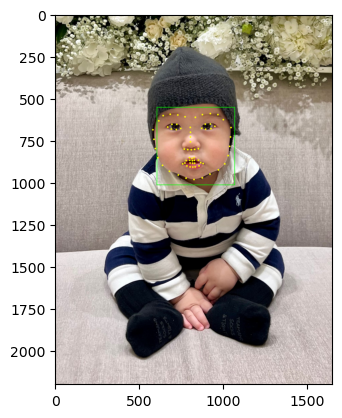

In [138]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [139]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값 → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index
    x = landmark[30][0] # 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (804, 760-(1016-554)//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (1067-605+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(804, 760)
(x,y) : (804,529)
(w,h) : (463,463)


In [140]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/king.png') # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(463, 463, 3)


In [142]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값
# y는 이미지에서 코 부위의 y값에서 얼굴 세로 길이의 1/2만큼 윗쪽 위치
# w, h는 얼굴 영역의 가로를 차지하는 픽셀의 수

#이미지 시작점은 top-left 좌표임.
#왕관 이미지 시작 좌표 설정
refined_x = x - w // 2 # 804 - (463//2)
refined_y = y - h

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (573,66)


In [122]:
# 왕관 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (573,66)


## 4. 투명 왕관

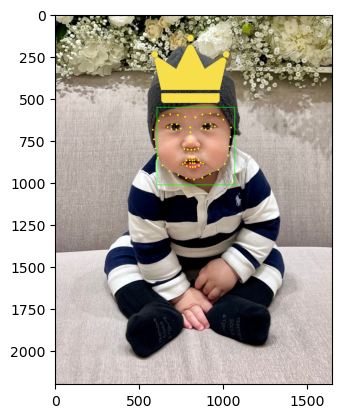

In [175]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [176]:
# 스티커 크기만큼의 영역을 잘라서 sticker_area에 저장
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] # 스티커 높이, 스티커 너비 & 위치

#plt.imshow(sticker_area)
#plt.show()

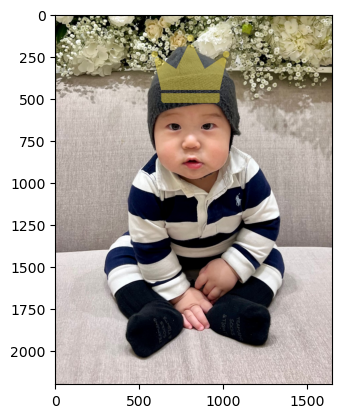

In [177]:
# 투명 스티커
img_sticker_trans = cv2.addWeighted(sticker_area, 0.5, img_sticker, 0.5, 0) # 투명스티커

# img_bgr_sticker: 스티커 합성
img_bgr_sticker = img_bgr.copy()
img_bgr_sticker[
    refined_y:refined_y+img_sticker.shape[0], # 원본 이미지 img_bgr, 스티커 img_sticker 
    refined_x:refined_x+img_sticker.shape[1]
    ] = np.where(  # np.where(조건, A, B) -> 픽셀 값이 0(검정)이면 -> A(원본유지), 아니면 B(스티커 적용)
        img_sticker==0,
        sticker_area, 
        img_sticker_trans).astype(np.uint8) #투명도 적용

plt.imshow(cv2.cvtColor(img_bgr_sticker, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

# (미션) 고양이 수염 스티커 만들기

In [2]:
!pip install cmake
!pip install opencv-python
!conda install -y dlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 89.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 91.1 MB/s eta 0:00:00:00:0100:01
Channels:
 - conda-forge
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - dlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    certifi-2026.1.4           |     pyhd8ed1ab_0         147 KB  conda-forge
    dlib-20.0.0                |cpu_py312hb8e531a_0         3.3 MB  conda-forge
    openssl-3.6.0              |       h26f9b46_0         3.0 MB  conda-forge
    ---

In [3]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import math

## 1. 이미지 준비

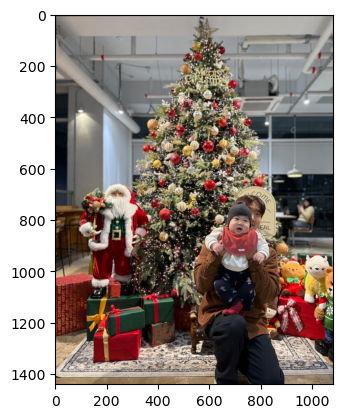

In [189]:
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/AIFFEL_quest_rs/Exploration/Ex01/images/jae_distance.jpg')

img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy() #출력용 이미지
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BGR -> RGB 변환

plt.imshow(img_rgb)
plt.show()

## 2. Face detector

In [190]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기
dlib_rects = detector_hog(img_rgb, 1)   # 이미지 키우기 1 > 2 > ...

# 찾은 얼굴 영역의 좌표 (여러 얼굴 가능)
print(dlib_rects)

rectangles[[(685, 785) (760, 860)]]


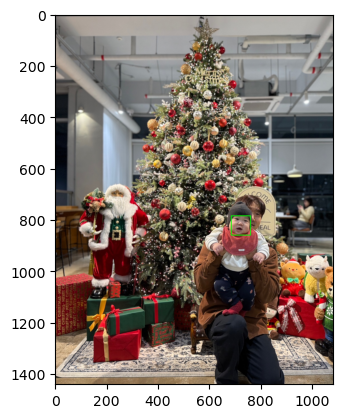

685 785 760 860


In [191]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    cv2.rectangle(img_show, # 사각형을 그릴 대상 이미지
                  (l,t), (r,b), # 사각형 좌표
                  (0,255,0), # 사각형 색상(BGR 순서)
                  2, # 선두께
                  lineType=cv2.LINE_AA) # 선의 렌더링 방식
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

print(l,t,r,b)

## 3. Face landmark

기준위치  
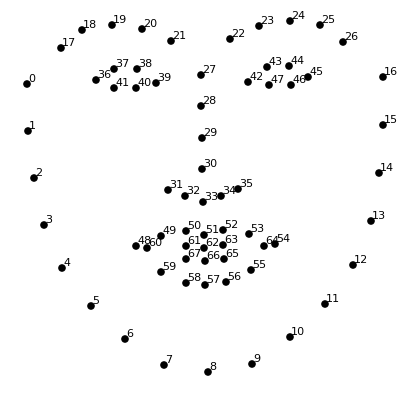

In [192]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 ~/work/AIFFEL_quest_rs/Exploration/Ex01/models
!cd ~/work/AIFFEL_quest_rs/Exploration/Ex01 && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2026-01-19 01:10:34--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2026-01-19 01:10:34--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  17.0MB/s    in 3.8s    

2026-01-19 01:10:39 (16.2 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


In [193]:
model_path = os.path.join(home_dir, 'work/AIFFEL_quest_rs/Exploration/Ex01/models/shape_predictor_68_face_landmarks.dat')
landmark_predictor = dlib.shape_predictor(model_path)

In [194]:
list_landmarks = [] #list 생성

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


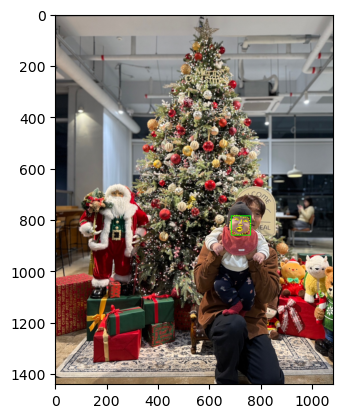

In [195]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [197]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코 index
    x = landmark[33][0]
    y = landmark[33][1]
    w = h = dlib_rect.width() # 스티커 사이즈 기준
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(720, 822)
(x,y) : (720,822)
(w,h) : (76,76)


#### 얼굴 각도
- roll  → atan2(눈 기울기)  
- yaw   → 좌우 비대칭 비율  
- pitch → 눈–코–턱 세로 비율 (적용X, 사람마다 비율이 다름)


In [198]:
def get_face_yaw(shape):
    left = np.array([shape.part(1).x, shape.part(1).y]) #왼쪽볼
    right = np.array([shape.part(15).x, shape.part(15).y]) #오른쪽볼
    nose = np.array([shape.part(33).x, shape.part(33).y]) #코

    dl = np.linalg.norm(nose - left) # 벡터 크기
    dr = np.linalg.norm(nose - right)

    yaw_norm = (dr - dl) / (dr + dl)  # [-1, 1]
    
    return yaw_norm

In [199]:
def get_face_roll_angle(shape):

    left_eye = np.array([shape.part(36).x, shape.part(36).y])
    right_eye = np.array([shape.part(45).x, shape.part(45).y])

    dx = right_eye[0] - left_eye[0]
    dy = right_eye[1] - left_eye[1]

    roll = -math.degrees(math.atan2(dy, dx))
    
    return roll

In [200]:
def apply_yaw(sticker, yaw):
 
    h, w = sticker.shape[:2] #스티커의 높이와 너비 추출
    center = np.array([[[w // 2, h // 2]]], dtype=np.float32)
    yaw = get_face_yaw(points)
    scale = yaw*0.4
    
    # 스티커 원본
    pts1 = np.float32([[0,0], [0,h], [w, 0], [w,h]])

    #변환 후 좌표 (4점)
    if yaw>0:
        pts2 = np.float32([[0,h*scale], [0,h*(1-scale)], [w, 0], [w, h]])
    else:
        pts2 = np.float32([[0,0], [0,h], [w, h*(-scale)], [w, h*(1+scale)]])
        
    # 투시 변환 매트릭스
    M = cv2.getPerspectiveTransform(pts1, pts2)
    
    # 투시 변환 적용
    warped = cv2.warpPerspective(sticker, M, (w, h), borderMode=cv2.BORDER_TRANSPARENT, borderValue=(0, 0, 0, 0))
    transformed_center = cv2.perspectiveTransform(center, M)[0][0] #변환된 센터점

    return warped, transformed_center

In [201]:
def apply_roll(sticker, roll, center):
 
    h, w = sticker.shape[:2]

    M = cv2.getRotationMatrix2D(center, roll, 1.0)
    rotated = cv2.warpAffine(sticker, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_TRANSPARENT, borderValue=(0, 0, 0, 0))
    
    return rotated

#### 스티커에 적용

-0.05379269289852467
-12.264773727892402


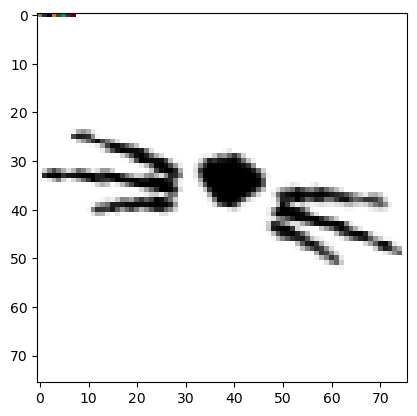

In [214]:
sticker_path = os.path.join(home_dir, 'work/AIFFEL_quest_rs/Exploration/Ex01/images/cat-whiskers.png')
sticker = cv2.imread(sticker_path)
sticker_resized = cv2.resize(sticker, (w,h))

yaw = get_face_yaw(points)
roll = get_face_roll_angle(points)
print(yaw)
print(roll)

sticker_warped, transformed_center= apply_yaw(sticker_resized, yaw)
sticker_rotated = apply_roll(sticker_warped, roll, transformed_center)

plt.imshow(sticker_rotated)
plt.show()

In [215]:
#이미지 시작점은 top-left 좌표
refined_x = x - int(transformed_center[0])  #w//2
refined_y = y - int(transformed_center[1]) #h//2

In [216]:
if refined_x < 0:
    sticker_rotated = sticker_rotated[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    sticker_rotated = sticker_rotated[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (682,784)


## 4. 합성

(1) np.where(조건, A, B): 픽셀 값이 0(검정)이면 -> A(원본유지), 아니면 B(스티커 적용)  
(2) cv2.addWeighted(A, alpha, B, beta, gamma): A 이미지 가중치 alph + B 이미지 가중치 beta + 밝기 보정상수 gamma (보통 0)

In [217]:
# 스티커 크기만큼의 영역을 잘라서 sticker_area에 저장
sticker_area = img_bgr[refined_y:refined_y +sticker_rotated.shape[0], refined_x:refined_x+sticker_rotated.shape[1]] # 스티커 높이, 스티커 너비 & 위치

#plt.imshow(sticker_area)
#plt.show()

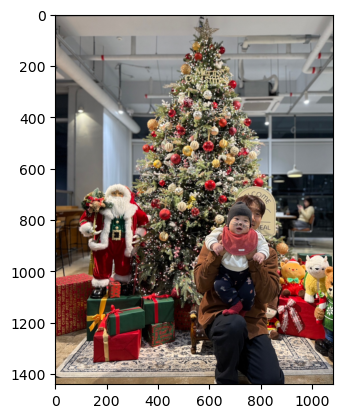

In [218]:
# 투명 스티커
img_sticker_trans = cv2.addWeighted(sticker_area, 0.5, sticker_rotated, 0.4, 0) # 투명스티커

# img_bgr_sticker: 스티커 합성
img_bgr_sticker = img_bgr.copy()
img_bgr_sticker[
    refined_y:refined_y+sticker_rotated.shape[0], # 원본 이미지 img_bgr, 스티커 img_sticker 
    refined_x:refined_x+sticker_rotated.shape[1]
    ] = np.where(  # np.where(조건, A, B) -> 픽셀 값이 0(검정)이면 -> A(원본유지), 아니면 B(스티커 적용)
        sticker_rotated==255,
        sticker_area, 
        img_sticker_trans).astype(np.uint8) #투명도 적용

plt.imshow(cv2.cvtColor(img_bgr_sticker, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

**문제점 찾아보기**  

- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
  - 스티커 각도도 변해야 한다.
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
  - 얼굴 인식이 잘 안돼서? 각도가 크게 변해서?
- 실행 속도가 중요할까요?
  - 네, 사용자 입장에서 실행 속도는 중요합니다.
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
  - 100% 정확할 필요는 없고, 이질감이 없을 정도면 괜찮지 않을까요?

**조건**  
- [X] 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.  
- [X] 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
- [X] 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.  

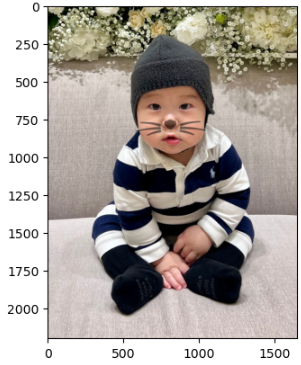
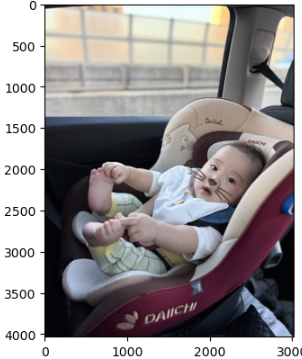
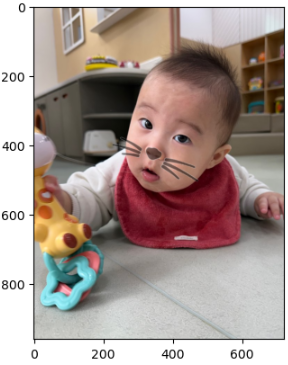  
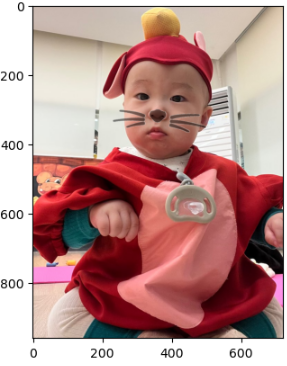
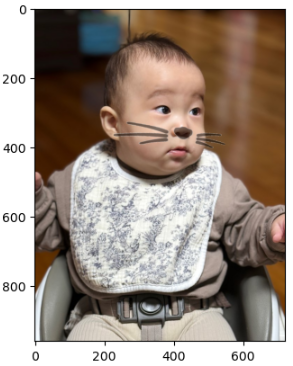
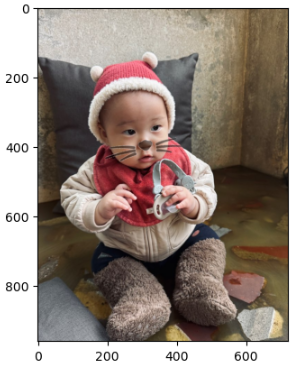  
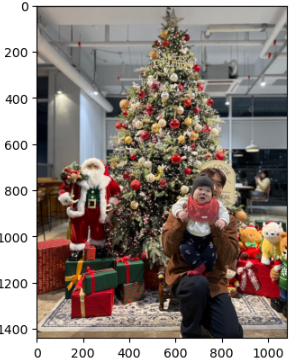